In [173]:
import pandas as pd
import numpy as np
states_all_raw = pd.read_csv('data/states_all.csv')

In [174]:
attributes = states_all_raw.columns
enrollmentatt = [key for key in attributes if 'GRADES' in key]+['ENROLL']
fundsatt = [key for key in attributes if 'REVENUE' in key]+[key for key in attributes if 'EXPENDITURE' in key]
scoresatt = [key for key in attributes if 'SCORE' in key]
#enrollmentatt, fundsatt, scoresatt

In [175]:
fundsdf0 = states_all_raw.sort_values(['STATE','YEAR']).drop(enrollmentatt+scoresatt, axis=1)
fundsdf = fundsdf0.groupby('STATE').apply(
    lambda grp: grp.interpolate(method='linear', 
                                limit_direction='both', 
                                limit_area='inside',
                                axis=0)).dropna().reset_index(drop=True)
fundsdf

,PRIMARY_KEY,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1993_ALABAMA,ALABAMA,1993,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0
1,1994_ALABAMA,ALABAMA,1994,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,306977.0,231508.0
2,1995_ALABAMA,ALABAMA,1995,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,888983.0,326956.0,243365.0
3,1996_ALABAMA,ALABAMA,1996,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0
4,1997_ALABAMA,ALABAMA,1997,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,1075352.0,323955.0,420070.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2012_WYOMING,WYOMING,2012,1664983.0,144728.0,851896.0,668359.0,1670728.0,845801.0,540510.0,53299.0,213245.0
1220,2013_WYOMING,WYOMING,2013,1695967.0,113501.0,881114.0,701352.0,1675477.0,846872.0,546422.0,52001.0,213920.0
1221,2014_WYOMING,WYOMING,2014,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,555761.0,50715.0,287977.0
1222,2015_WYOMING,WYOMING,2015,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,565489.0,52520.0,409425.0


In [176]:
scoresdf0 = states_all_raw.sort_values(['STATE','YEAR']).drop(enrollmentatt + fundsatt, axis=1)
scoresdf = scoresdf0.groupby('STATE').apply(
    lambda grp: grp.interpolate(method='linear', 
                                limit_direction='both', 
                                limit_area='inside',
                                axis=0)).dropna().reset_index(drop=True)
scoresdf

,PRIMARY_KEY,STATE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1998_ALABAMA,ALABAMA,1998,214.750,261.000000,211.0,255.0
1,1999_ALABAMA,ALABAMA,1999,215.875,262.500000,210.0,254.5
2,2000_ALABAMA,ALABAMA,2000,217.000,264.000000,209.0,254.0
3,2001_ALABAMA,ALABAMA,2001,219.000,263.333333,208.0,253.5
4,2002_ALABAMA,ALABAMA,2002,221.000,262.666667,207.0,253.0
...,...,...,...,...,...,...,...
1017,2014_WYOMING,WYOMING,2014,247.000,287.500000,227.0,270.0
1018,2015_WYOMING,WYOMING,2015,247.000,287.000000,228.0,269.0
1019,2016_WYOMING,WYOMING,2016,247.500,288.000000,227.5,269.0
1020,2017_WYOMING,WYOMING,2017,248.000,289.000000,227.0,269.0


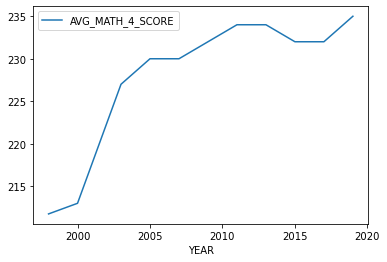

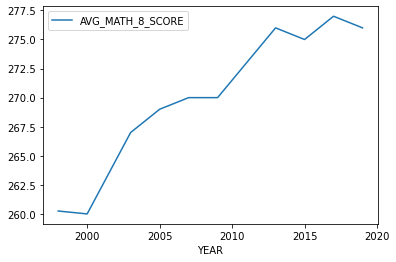

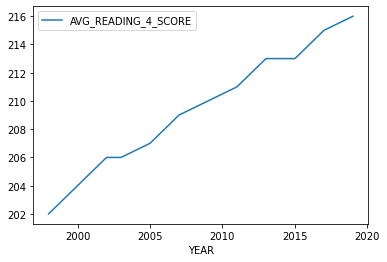

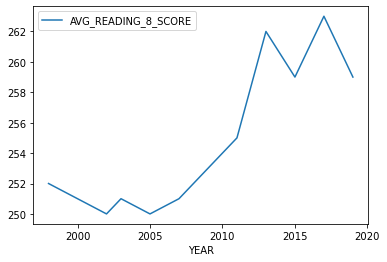

In [177]:
ca = scoresdf.sort_values('YEAR').groupby('STATE').get_group('CALIFORNIA')
for col in scoresatt:
    ca.plot(x='YEAR', y=col)

# 1

In [178]:
df0 = states_all_raw.sort_values(['STATE', 'YEAR']).drop(['PRIMARY_KEY','ENROLL'], axis=1)

In [179]:
df0.drop('YEAR', axis=1).describe()

,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,1.275000e+03,1542.000000,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,17840.958495,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,1.329473e+06,30016.603510,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,1.815070e+05,2199.750000,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.000000,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,9.661480e+05,22691.750000,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


Interesting points:
- Strangely, 'STATE_REVENUE'=0 for all years in District of Columbia.
- Most variables have means closer to their third quartiles than their medians, which is likely because the means are more heavily affected by large (outlier) states.
- Standard deviations for all but test scores are on the order of their mean values, implying huge differences between states on non-score variables.

# 2

<AxesSubplot:xlabel='YEAR'>

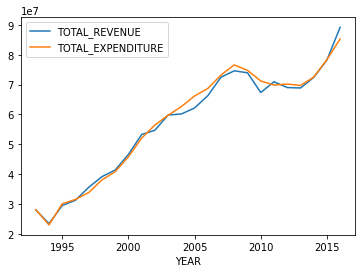

In [180]:
cafunds = fundsdf.groupby('STATE').get_group('CALIFORNIA')
cafunds.plot(x='YEAR', y=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'], kind='line')

Total revenue and expenditure seem to follow eachother closely over the years, likely due to economic growth over time. Notably, after 2008 (the year of the financial crisis), the revenue and expenditure both dipped and went down slightly, likely due to the recent recession. Then, around 2013-2014, both revenue and expenditure started to increase again (more rapidly than before), which may be due to Proposition 98 that increased public school funding in the state.

# 3

array([[<AxesSubplot:xlabel='YEAR'>, <AxesSubplot:xlabel='YEAR'>],
       [<AxesSubplot:xlabel='YEAR'>, <AxesSubplot:xlabel='YEAR'>]],
      dtype=object)

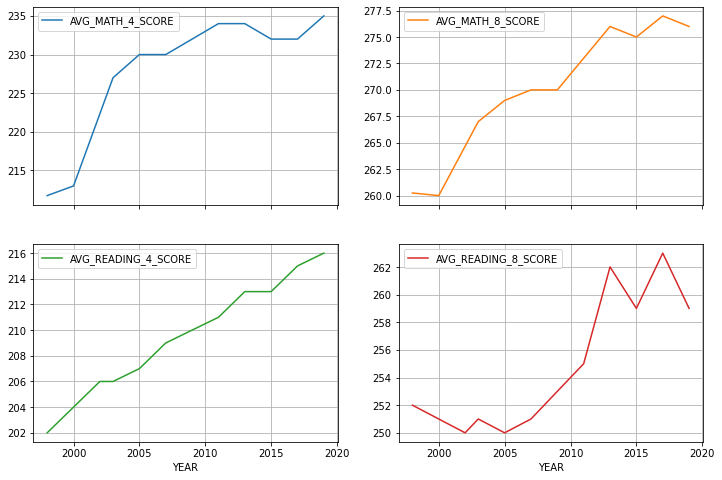

In [181]:
cascores = scoresdf.groupby('STATE').get_group('CALIFORNIA')
cascores.plot(x='YEAR', y=scoresatt, subplots=True, figsize=(12,8), layout=(2,2), grid=True)

In [182]:
scores = cascores.copy().reset_index(drop=True)
scores[scoresatt]=scores[scoresatt].round(1)

for subj in ['MATH','READING']:
    diffcolname = 'DELTA_'+subj
    gr4 = scores['AVG_'+subj+'_4_SCORE']
    gr8 = scores['AVG_'+subj+'_8_SCORE'][4:].reset_index(drop=True)
        # The index is shifted by 4 here because if students are in grade 4 in year Y, then they are in grade 8 in year Y+4
        # thus the teacing quality in year Y can be approximated by the change in students' performances between years Y and Y+4.
    display(pd.DataFrame([scores.YEAR,gr4,gr8,gr8-gr4],index=['Yr','Gr4_'+subj+'_SCORE', 'FutureGr8_'+subj+'_SCORE', 'Projected_Improvement']).T)
    delta = gr8-gr4
    scores.insert(
        scores.columns.get_loc('AVG_'+subj+'_8_SCORE')+1, 
        diffcolname,
        delta)
scores

,Yr,Gr4_MATH_SCORE,FutureGr8_MATH_SCORE,Projected_Improvement
0,1998.0,211.8,264.7,52.9
1,1999.0,212.4,267.0,54.6
2,2000.0,213.0,268.0,55.0
3,2001.0,217.7,269.0,51.3
4,2002.0,222.3,269.5,47.2
5,2003.0,227.0,270.0,43.0
6,2004.0,228.5,270.0,41.5
7,2005.0,230.0,270.0,40.0
8,2006.0,230.0,271.5,41.5
9,2007.0,230.0,273.0,43.0


,Yr,Gr4_READING_SCORE,FutureGr8_READING_SCORE,Projected_Improvement
0,1998.0,202.0,250.0,48.0
1,1999.0,203.0,251.0,48.0
2,2000.0,204.0,250.5,46.5
3,2001.0,205.0,250.0,45.0
4,2002.0,206.0,250.5,44.5
5,2003.0,206.0,251.0,45.0
6,2004.0,206.5,252.0,45.5
7,2005.0,207.0,253.0,46.0
8,2006.0,208.0,254.0,46.0
9,2007.0,209.0,255.0,46.0


,PRIMARY_KEY,STATE,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,DELTA_MATH,AVG_READING_4_SCORE,AVG_READING_8_SCORE,DELTA_READING
0,1998_CALIFORNIA,CALIFORNIA,1998,211.8,260.2,52.9,202.0,252.0,48.0
1,1999_CALIFORNIA,CALIFORNIA,1999,212.4,260.1,54.6,203.0,251.5,48.0
2,2000_CALIFORNIA,CALIFORNIA,2000,213.0,260.0,55.0,204.0,251.0,46.5
3,2001_CALIFORNIA,CALIFORNIA,2001,217.7,262.3,51.3,205.0,250.5,45.0
4,2002_CALIFORNIA,CALIFORNIA,2002,222.3,264.7,47.2,206.0,250.0,44.5
5,2003_CALIFORNIA,CALIFORNIA,2003,227.0,267.0,43.0,206.0,251.0,45.0
6,2004_CALIFORNIA,CALIFORNIA,2004,228.5,268.0,41.5,206.5,250.5,45.5
7,2005_CALIFORNIA,CALIFORNIA,2005,230.0,269.0,40.0,207.0,250.0,46.0
8,2006_CALIFORNIA,CALIFORNIA,2006,230.0,269.5,41.5,208.0,250.5,46.0
9,2007_CALIFORNIA,CALIFORNIA,2007,230.0,270.0,43.0,209.0,251.0,46.0


<AxesSubplot:xlabel='YEAR'>

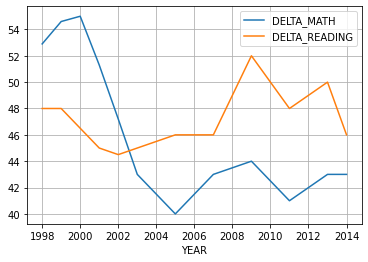

In [183]:
scores.plot(x='YEAR', y=['DELTA_MATH', 'DELTA_READING'], grid=True)

By my estimates, it appears that reading lessons have been more successful than math lessons since approximately 2002.

# 4

## Math Scores:

<AxesSubplot:title={'center':'Histogram of Average Scores over Time By State'}>

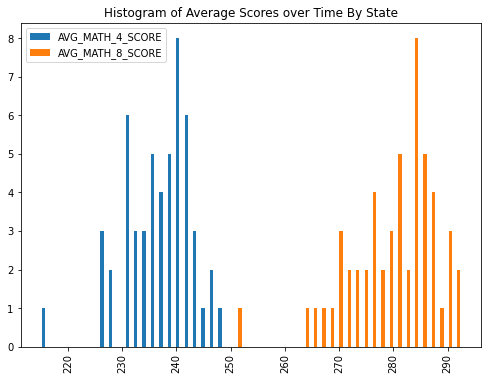

In [184]:
meanscores_bystate = scoresdf.groupby('STATE').mean()
meanscores_bystate.insert(0, 'Title', 'Histogram of Average Scores over Time By State')
meanscores_bystate.hist( by='Title',
    column=scoresatt[:2], 
    bins=50,
    legend=True,
    figsize=(8,6))

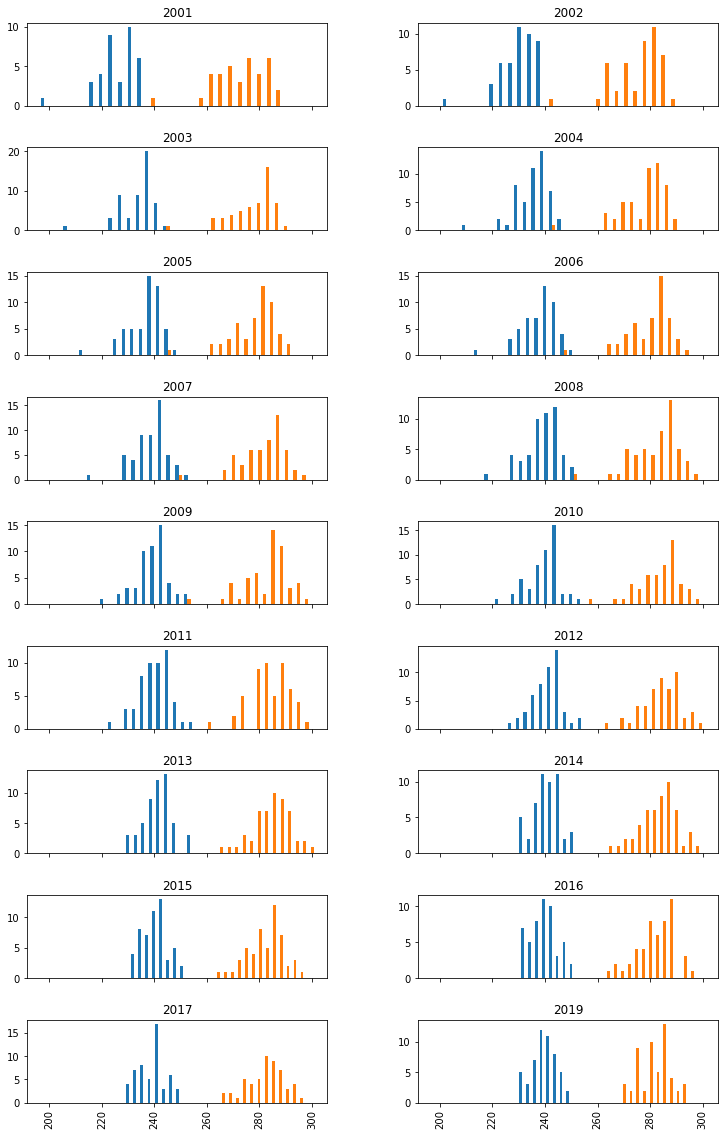

In [185]:
ax = scoresdf[scoresdf.YEAR>2000].hist(by='YEAR', 
    column=scoresatt[:2], 
    legend=False, layout=(9,2),
    figsize=(12,20), 
    sharex=True, grid=True, bins=25)

## Reading Scores:

<AxesSubplot:title={'center':'Histogram of Average Scores over Time By State'}>

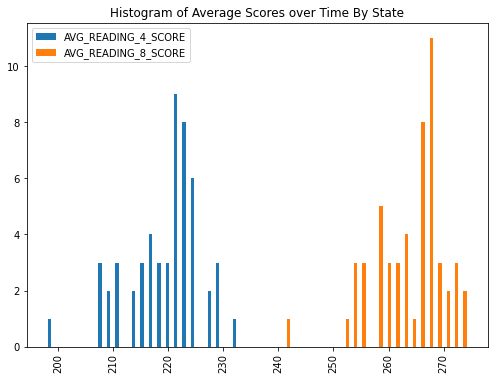

In [186]:
meanscores_bystate.hist( by='Title',
    column=scoresatt[2:], 
    bins=50,
    legend=True,
    figsize=(8,6))

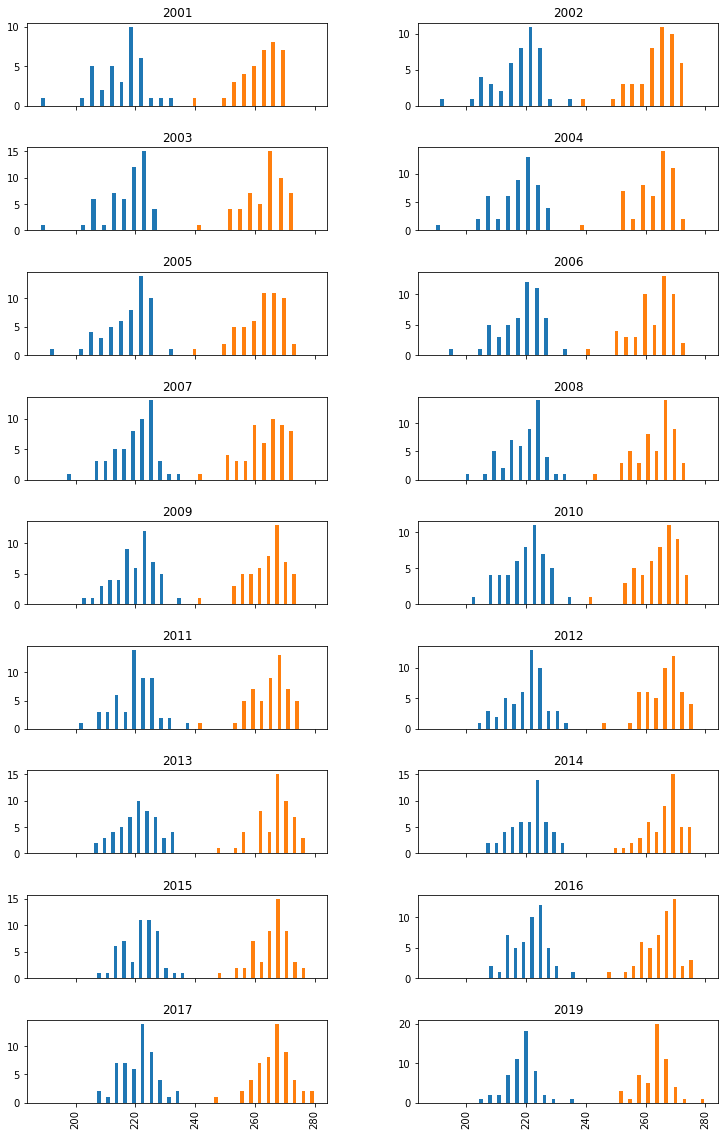

In [187]:
ax = scoresdf[scoresdf.YEAR>2000].hist(by='YEAR', 
    column=scoresatt[2:], 
    legend=False, layout=(9,2),
    figsize=(12,20), 
    sharex=True, grid=True, bins=25)

## Analysis

scores for states appear to be distributed in a skewed-left bell shape, and they seem to be skewed less over time, while their averages seem to move rightward (scores on average improve over time).

# 5

In [188]:
df0 = scoresdf0.drop('PRIMARY_KEY', axis=1).drop(scoresdf0[(scoresdf0.YEAR < 1989)|(scoresdf0.STATE == 'DODEA')].index).reset_index(drop=True)
df = df0.copy()

yrs = df.YEAR.unique()
yrdict = {}
for interval in np.split(yrs, 6):
    id = f'{interval[0]}-{interval[-1]}'
    for yr in interval:
        yrdict[yr] = id

df.insert(df.columns.get_loc('YEAR')+1,
    'YrRange',
    df.YEAR.replace(yrdict))
df

,STATE,YEAR,YrRange,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1989,1989-1993,NaN,NaN,NaN,NaN
1,ALABAMA,1990,1989-1993,NaN,253.0,NaN,NaN
2,ALABAMA,1991,1989-1993,NaN,NaN,NaN,NaN
3,ALABAMA,1992,1989-1993,208.0,252.0,207.0,NaN
4,ALABAMA,1993,1989-1993,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1541,WYOMING,2014,2014-2019,NaN,NaN,NaN,NaN
1542,WYOMING,2015,2014-2019,247.0,287.0,228.0,269.0
1543,WYOMING,2016,2014-2019,NaN,NaN,NaN,NaN
1544,WYOMING,2017,2014-2019,248.0,289.0,227.0,269.0


In [189]:
dfmean = df.groupby('STATE').apply(lambda g: g.fillna(np.round(g[scoresatt].mean(), 1)))

In [190]:
dfmed = df.groupby('STATE').apply(lambda g: g.fillna(g[scoresatt].median()))

In [191]:
dfinterp = df.groupby('STATE').apply(lambda g: g.interpolate(limit_direction='both'))

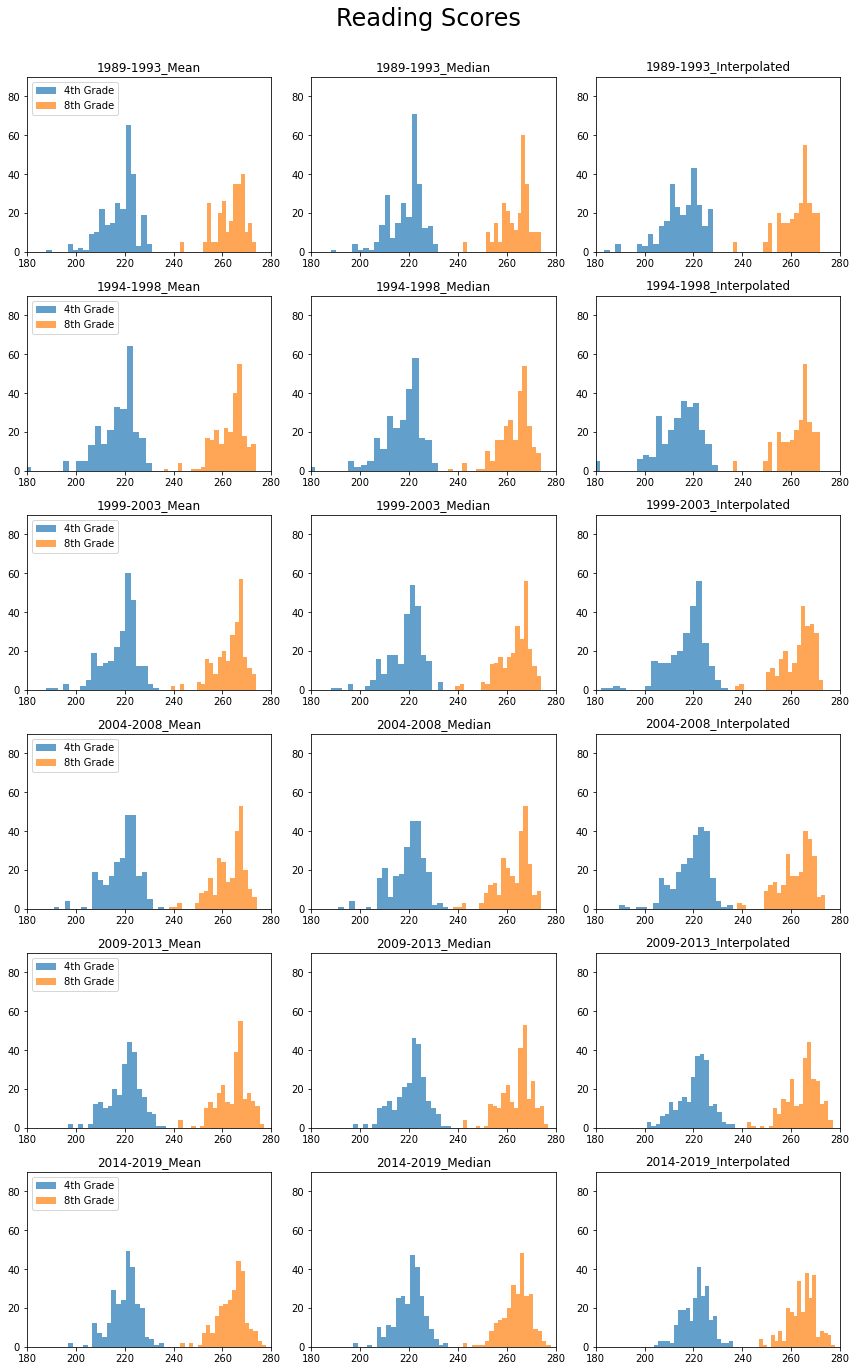

In [192]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 3, figsize=(12,20))

for row, yrrange in enumerate(df.YrRange.unique()):
    for col, dfr in enumerate([dfmean, dfmed, dfinterp]):
        dfr_ext=['_Mean', '_Median', '_Interpolated'][col]
        gr4 = dfr[scoresatt[2]][dfr.YrRange == yrrange]
        gr8 = dfr[scoresatt[3]][dfr.YrRange == yrrange]
        plt.subplot(6,3, (col+1)+(row*3), 
            title=yrrange+dfr_ext,
            xlim=[180,280], ylim=[0,90]
            )
        for gr,lbl in [(gr4, '4th Grade'), (gr8, '8th Grade')]:
            plt.hist(gr, label=lbl, bins=20, alpha=.7)
        if col==0: plt.legend(loc='upper left')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Reading Scores', fontsize=24)
plt.show()

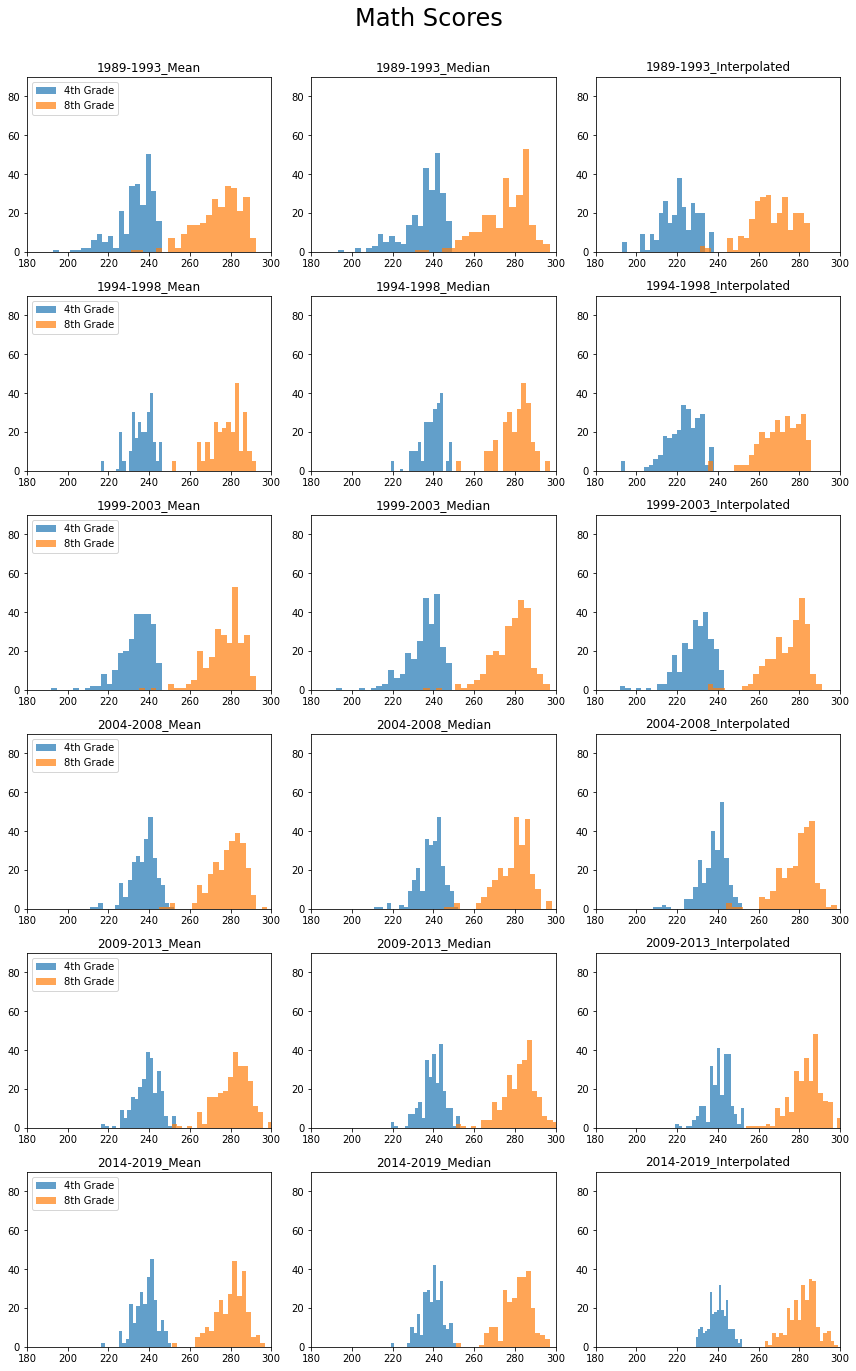

In [193]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 3, figsize=(12,20))

for row, yrrange in enumerate(df.YrRange.unique()):
    for col, dfr in enumerate([dfmean, dfmed, dfinterp]):
        dfr_ext=['_Mean', '_Median', '_Interpolated'][col]
        gr4 = dfr[scoresatt[0]][dfr.YrRange == yrrange]
        gr8 = dfr[scoresatt[1]][dfr.YrRange == yrrange]
        plt.subplot(6,3, (col+1)+(row*3), 
            title=yrrange+dfr_ext,
            xlim=[180,300], ylim=[0,90]
            )
        for gr,lbl in [(gr4, '4th Grade'), (gr8, '8th Grade')]:
            plt.hist(gr, label=lbl, bins=20, alpha=.7)
        if col==0: plt.legend(loc='upper left')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Math Scores', fontsize=24)
plt.show()

Distribution from interpolation tends to be the flattest, followed by mean and then median. The interpolation also seems to have the least skewed distribution.